### Intrusion Detection System

In [2]:
import pandas as pd

In [5]:
import os
os.getcwd()

'/content'

### STEP 1: Load Dataset

In [11]:
import os
os.listdir('/content')

['.config', 'sample_data']

In [13]:
!wget https://raw.githubusercontent.com/defcom17/NSL_KDD/master/KDDTrain+.txt

--2026-01-12 16:55:30--  https://raw.githubusercontent.com/defcom17/NSL_KDD/master/KDDTrain+.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19109424 (18M) [text/plain]
Saving to: ‘KDDTrain+.txt’

KDDTrain+.txt       100%[===================>]  18.22M  52.1MB/s    in 0.3s    

2026-01-12 16:55:32 (52.1 MB/s) - ‘KDDTrain+.txt’ saved [19109424/19109424]



In [14]:
!ls

KDDTrain+.txt  sample_data


In [15]:
import pandas as pd

data = pd.read_csv('KDDTrain+.txt', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


### STEP 2: Preprocessing

In [16]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data[41] = encoder.fit_transform(data[41])

#### Assign column names

In [18]:
columns = [
'duration','protocol_type','service','flag','src_bytes','dst_bytes','land',
'wrong_fragment','urgent','hot','num_failed_logins','logged_in',
'num_compromised','root_shell','su_attempted','num_root',
'num_file_creations','num_shells','num_access_files','num_outbound_cmds',
'is_host_login','is_guest_login','count','srv_count','serror_rate',
'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate',
'diff_srv_rate','srv_diff_host_rate','dst_host_count',
'dst_host_srv_count','dst_host_same_srv_rate',
'dst_host_diff_srv_rate','dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate','dst_host_serror_rate',
'dst_host_srv_serror_rate','dst_host_rerror_rate',
'dst_host_srv_rerror_rate','label','difficulty'
]

data.columns = columns

#### Separate features & label

In [19]:
X = data.drop(['label', 'difficulty'], axis=1)
y = data['label']

#### Encode categorical features

In [20]:
cat_cols = ['protocol_type', 'service', 'flag']

#### Apply One-Hot Encoding:

In [21]:
X = pd.get_dummies(X, columns=cat_cols)

#### Encode target labels

In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

###Step: 3 Train the model

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [24]:
X.select_dtypes(include=['object']).columns

Index([], dtype='object')

### STEP 4: Evaluation

In [25]:
from sklearn.metrics import accuracy_score

pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, pred))

Accuracy: 0.9980154792617583


### Simple Bar Graph for Accuracy

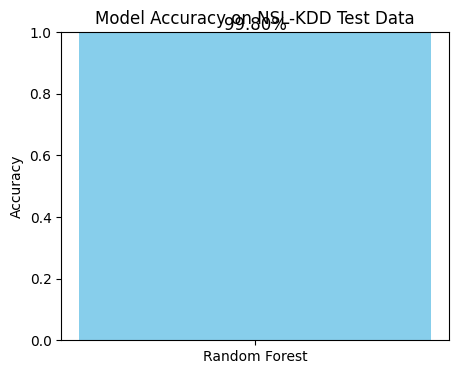

In [26]:
import matplotlib.pyplot as plt

# Accuracy value
accuracy = accuracy_score(y_test, pred)

# Create a bar chart
plt.figure(figsize=(5,4))
plt.bar(['Random Forest'], [accuracy], color='skyblue')
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.ylabel('Accuracy')
plt.title('Model Accuracy on NSL-KDD Test Data')

# Add accuracy value on top of the bar
plt.text(0, accuracy + 0.01, f"{accuracy*100:.2f}%", ha='center', fontsize=12)

plt.show()

### Confusion Matrix Heatmap (Better for IDS)

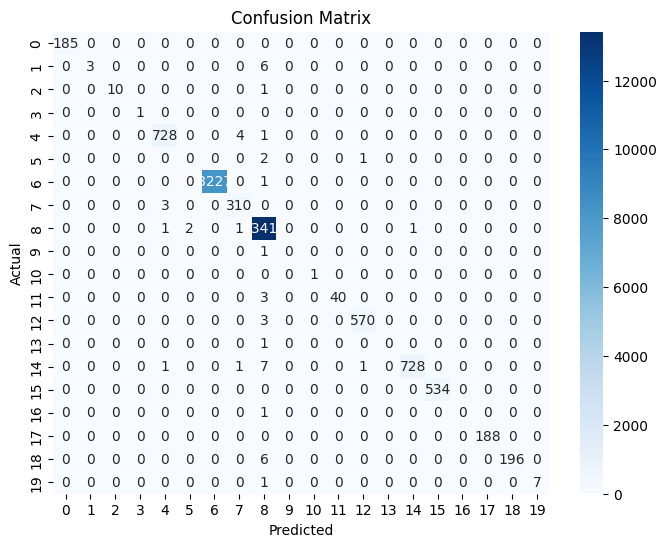

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()